In [1]:
import numpy as np
import pandas as pd

from scipy.stats import norm



import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
df= sns.load_dataset("mpg")
mpg_mean = np.mean(df['mpg'])
df.mpg.count()

398

## Mean

$$ A = \dfrac1 n \sum \limits _{i=0} ^n a_{i} = \dfrac {a_{1} + a_{2} + ..... + a_{n}} n $$


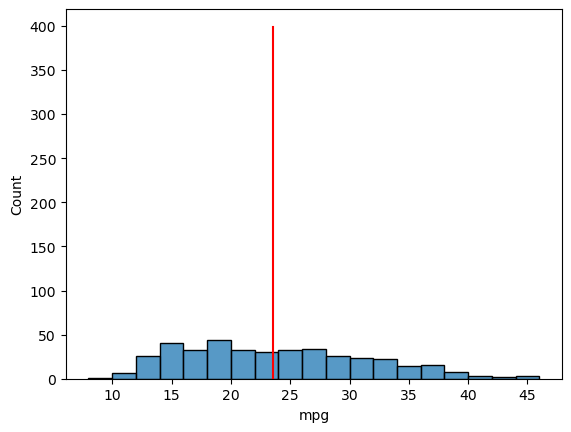

In [4]:
sns.histplot(x=df['mpg'],data=df,bins =[i for i in range(8,47,2)])
plt.plot([mpg_mean for i in range(0,400)],[i for i in range(0,400)], c="red")
plt.show()

## Median

$$
\text{Med}(X) =
\begin{cases}
X_{\frac{n-1}{2}} & \text{if } n \text{ is odd} \\
\frac{X_{\frac{n}{2}} + X_{\frac{n}{2} + 1}}{2} & \text{if } n \text{ is even}
\end{cases}
$$

X = ordered list of values in data set

n =	number of values in data set


In [6]:
mpg_median = np.median(df.mpg)
mpg_median

23.0

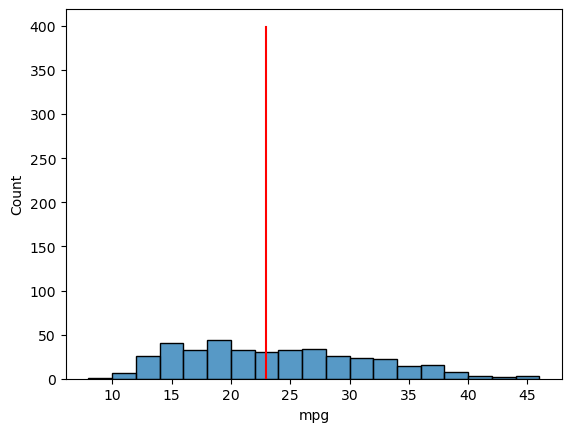

In [7]:
sns.histplot(x=df['mpg'],data=df,bins =[i for i in range(8,47,2)])
plt.plot([mpg_median for i in range(0,400)],[i for i in range(0,400)], c="red")
plt.show()

## Mode

$$ $$

In [9]:
hp_mode = df.horsepower.mode()[0]
hp_mode

150.0

In [10]:
df.horsepower.value_counts()
df.horsepower.min()

46.0

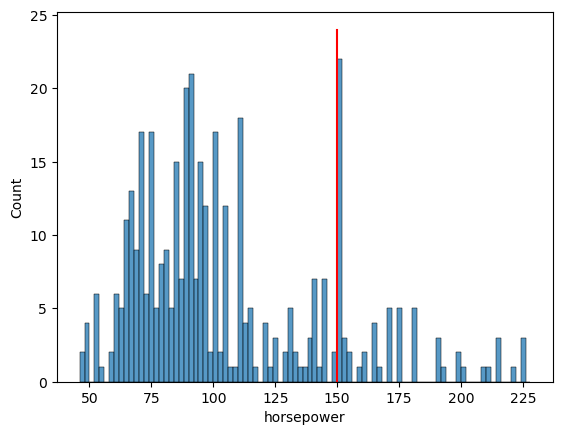

In [11]:
sns.histplot(x=df['horsepower'],data=df,bins =[i for i in range(46,230,2)])
plt.plot([hp_mode for i in range(0,25)],[i for i in range(0,25)], c="red")
plt.show()

## Range

In [13]:
min_hp = df.horsepower.min()
max_hp = df.horsepower.max()
print(f"Minimum HP: {min_hp}, Maximum HP: {max_hp}")

Minimum HP: 46.0, Maximum HP: 230.0


In [14]:
hp_r = max_hp - min_hp 
print(f"Range of horsepower: {hp_r}")

Range of horsepower: 184.0


## Mean Absolute Deviation

$$ \dfrac1 n \sum \limits _{i=1} ^n \mid x_i - m(X) \mid$$


Mean absolute deviation or average absolute deviation, When the data is too spread out, MAD comes into play. MAD is used to determine which data is best to fit a model as it asses the spreadness of the data. The data with the lowest MAD wins!

In [17]:
arr_a = np.random.randint(10,100,10)
arr_b = np.random.randint(10,100,10)
num = np.array([1,2,3,4,5,6,7,8,9,10])

In [18]:
arr_a_mean = np.mean(arr_a)
arr_a_mean

59.6

In [19]:
arr_b_mean = np.mean(arr_b)
arr_b_mean

63.2

In [20]:
mad_a = np.sum(np.abs(arr_a - arr_a_mean)) / len(arr_a)
mad_b = np.sum(np.abs(arr_b - arr_b_mean)) / len(arr_b)
mad_a, mad_b

(19.880000000000003, 19.8)

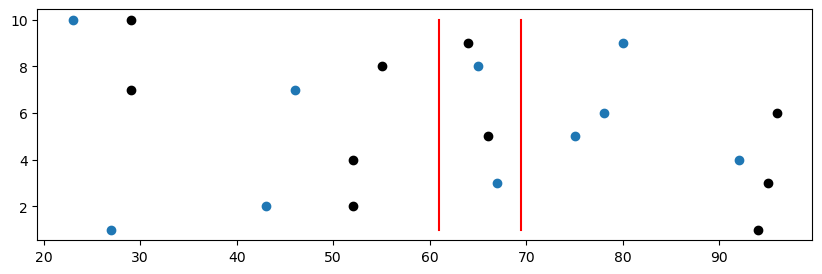

In [21]:
plt.figure(figsize=(10,3))
plt.scatter(arr_a, num)
plt.scatter(arr_b, num, c='black')
plt.plot([69.4,69.4,69.4,69.4,69.4,69.4,69.4,69.4,69.4,69.4], num, c = 'red')
plt.plot([61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,], num, c = 'red')
plt.show()


## Standard Deviation

$$ \sigma = \sqrt \frac{{\sum(x_i - u)^2 }} {N} $$


In [23]:
np.std(df.horsepower)

38.442032714425984

## Variance


$$ S^2 = \frac{{\sum(x_i - \bar{x})^2 }} {n-1} $$

In [25]:
np.var(df.horsepower)

1477.7898792169979

In [26]:
(np.std(df.horsepower))**2

1477.7898792169976

## Percentiles

In [28]:
np.percentile(df['mpg'],0)

9.0

In [29]:
df.mpg.min()

9.0

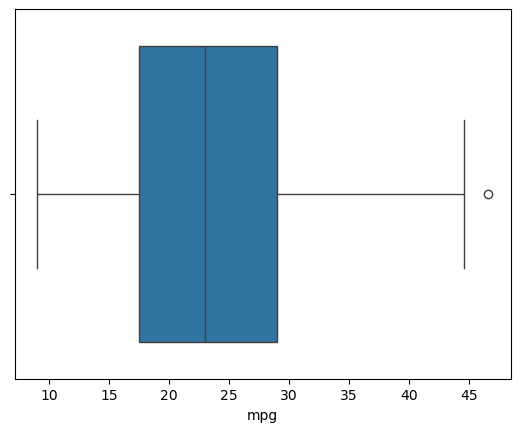

In [30]:
sns.boxplot(x=df.mpg, data=df)
plt.show()

## Skewness


If the data is positively skewed, the tail is longer on the right side and if the data is negatively skewed the tail is longer on the left side.

In [123]:
df.horsepower.skew()

1.0873262824048695

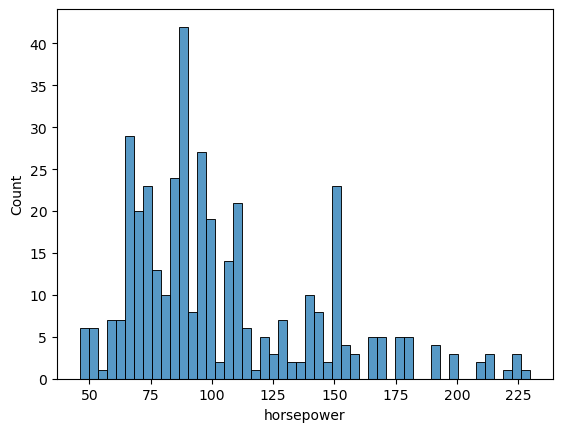

In [121]:
sns.histplot(df.horsepower,bins=50)
plt.show()

## Probability Distribution Function (p.d.f)

PDF for continuous variables and PMF for discrete

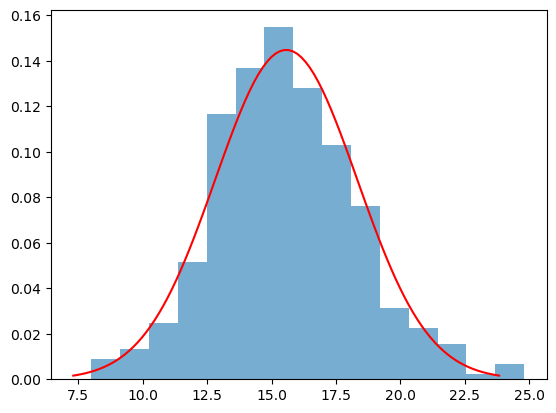

15.568090452261307 2.7542223175940177


In [35]:
mu = np.mean(df['acceleration'])
sigma = np.std(df['acceleration'])
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x,mu,sigma)
plt.hist(df['acceleration'],bins=15,density=True,alpha=0.6,label='Histogram')
plt.plot(x,y,'r-')
plt.show()
print(mu,sigma)

## Covariance

$$ Cov(x,y) =   \frac{ \sum (x_i - \bar x) .  (y_i - \bar y)}  {N}$$


If x increases and y increases then there is a positive covariance,
if x decreases and y increases then there is a negative covariance,
if x increases/decreases and there is no change in y then there is 0 covariance.

The range of covariance is between: $$ (-\infty , +\infty) $$


In [37]:
cov_acc_mpg = np.cov(df['acceleration'],df['mpg'])
cov_acc_mpg

array([[ 7.60484823,  9.05892966],
       [ 9.05892966, 61.08961077]])

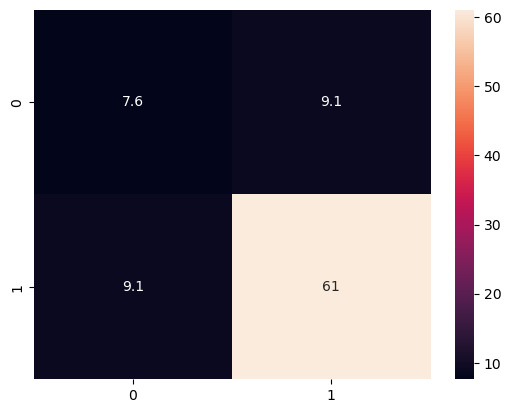

In [38]:
sns.heatmap(cov_acc_mpg,annot=True)
plt.show()

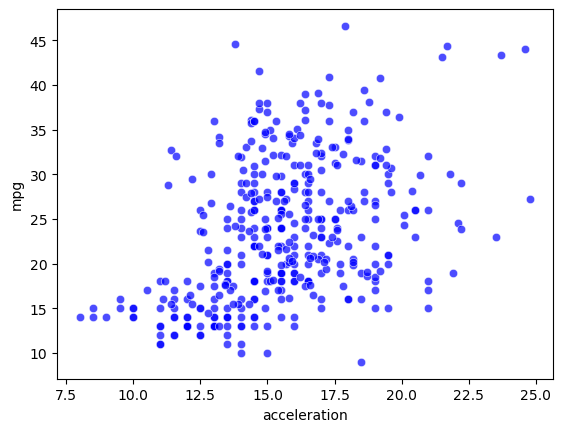

In [39]:
sns.scatterplot(x=df['acceleration'],y=df['mpg'],alpha=0.7,color='blue')
plt.show()

## Correlation

$$ Correlation = \frac {Cov(x,y)}  {\sigma x . \sigma y} $$

The range of correlation is between: 

$$ (-1, 1) $$

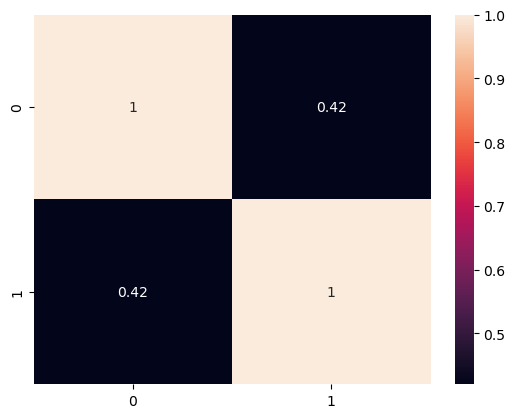

In [41]:
std_x = np.sqrt(cov_acc_mpg[0,0]) 
std_y = np.sqrt(cov_acc_mpg[1,1])
corr = [cov_acc_mpg[0,1] / (std_x * std_y)]
a = np.corrcoef(df['acceleration'],df['mpg'])
sns.heatmap(a,annot=True)
plt.show()

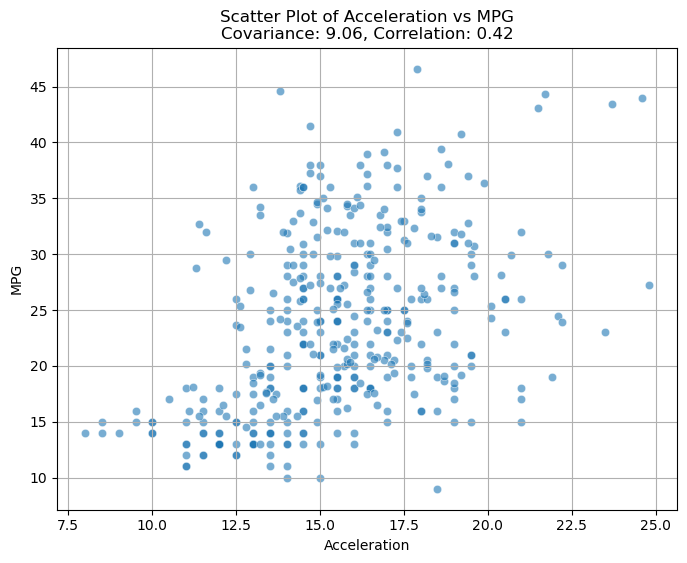

In [42]:
cov_acc_mpg = np.cov(df['acceleration'], df['mpg'])[0, 1]
std_x = np.std(df['acceleration'])
std_y = np.std(df['mpg'])
corr = cov_acc_mpg / (std_x * std_y)  

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['acceleration'], y=df['mpg'], alpha=0.6)
plt.title(f'Scatter Plot of Acceleration vs MPG\nCovariance: {cov_acc_mpg:.2f}, Correlation: {corr:.2f}')
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

## Central Limit Theorem

If you take samples from a population data, then the mean of those samples will be equal to the population mean

In [44]:
clt_data = [np.random.randint(10,100) for i in range(10000)]
clt_data = pd.DataFrame({"population": clt_data})

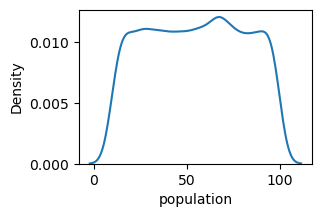

In [45]:
plt.figure(figsize=(3,2))
sns.kdeplot(x="population", data=clt_data)
plt.show()

In [46]:
sample_mean = []

for num in range(150):
    sample_data = []
    for data in range(500):
        sample_data.append(np.random.choice(clt_data['population']))
    sample_mean.append(np.mean(sample_data))

In [47]:
sample_mean = pd.DataFrame({"Sample Mean": sample_mean})

In [48]:
print(f" Sample mean {np.mean(sample_mean)}, Population mean: {np.mean(clt_data)}")

 Sample mean 54.71886666666666, Population mean: 54.8068


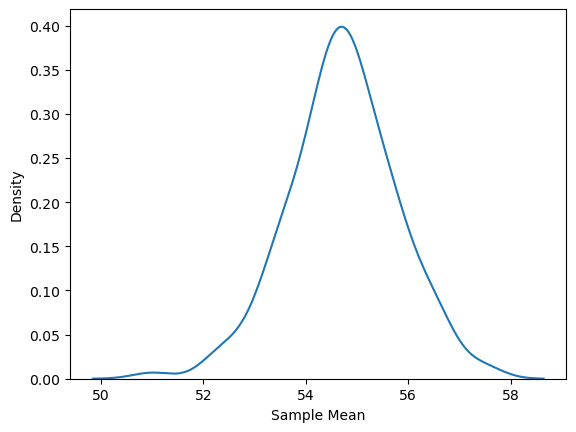

In [49]:
sns.kdeplot(x='Sample Mean',data=sample_mean)
plt.show()

## Hypothesis Testing

In [134]:
import scipy.stats as st

In [199]:
x_bar = 46.44
mu = 47
sigma = 6
n = 49

H_0 = "Manufacturer claims the average life span is 1200 hrs"
H_1 = "The average lifespan is not 1200 hrs"

z_value = (x_bar - mu) / (sigma / n**0.5)
print(z_value)

z_table = st.norm.ppf(0.01)
print(z_table)

if z_value < z_table:
    print("We reject the null hypothesis!")
else:
    print("We fail to reject the null hypothesis!")

print(f"The p-value is: {st.norm.cdf(z_value)}")

-0.653333333333336
-2.3263478740408408
We fail to reject the null hypothesis!
The p-value is: 0.2567707037112666
